In [1]:
import pandas as pd

df = pd.read_table("./LocalAuthorities.txt", names=["Region", "LA", "Land_Area", "Population", "Population_Per_Mile", "Population_per_kilometer"])
print(df.loc[df["LA"]=="Hampshire"])

Empty DataFrame
Columns: [Region, LA, Land_Area, Population, Population_Per_Mile, Population_per_kilometer]
Index: []


In [157]:
df=pd.read_csv("./uk-local-authority-ghg-emissions-2020-dataset.csv")
df_la = df.drop_duplicates(subset=["Local Authority"], keep="last")[["Local Authority Code", "Region", "Local Authority", "Area (km2)", "Mid-year Population (thousands)", "Calendar Year"]];
#df_la.drop(df_la[df_la["Region"]=="London"].index, inplace=True);
df_la = df_la.sort_values(["Local Authority Code", "Calendar Year", "Area (km2)"])
df_la

,Local Authority Code,Region,Local Authority,Area (km2),Mid-year Population (thousands),Calendar Year
143981,E06000001,North East,Hartlepool,98.3466,93.836,2020
145182,E06000002,North East,Middlesbrough,54.5537,141.285,2020
150230,E06000003,North East,Redcar and Cleveland,253.7857,137.228,2020
152689,E06000004,North East,Stockton-on-Tees,209.7309,197.419,2020
140186,E06000005,North East,Darlington,197.4758,107.402,2020
...,...,...,...,...,...,...
464874,W06000020,Wales,Torfaen,126.2401,94.832,2020
455912,W06000021,Wales,Monmouthshire,886.0557,95.164,2020
458468,W06000022,Wales,Newport,217.4554,156.447,2020
461014,W06000023,Wales,Powys,5195.4561,133.030,2020


In [158]:
df_roads = pd.read_csv("./rdl0202.csv", skiprows=6)
df_roads = df_roads[["ONS Area \nCode", "Region", "Local Authority", "All 'A' roads", "Total road length "]]
#df_roads.drop(df_roads[df_roads["Region"]=="London"].index, inplace=True);
df_roads=df_roads.sort_values(["ONS Area \nCode"])
df_roads

,ONS Area \nCode,Region,Local Authority,All 'A' roads,Total road length
2,E06000001,North East,Hartlepool UA,48.0,413.6
3,E06000002,North East,Middlesbrough UA,48.4,540.5
5,E06000003,North East,Redcar and Cleveland UA,95.4,689.4
6,E06000004,North East,Stockton-on-Tees UA,104.1,900.3
1,E06000005,North East,Darlington UA,65.0,563.2
...,...,...,...,...,...
171,W06000020,Wales,Torfaen,36.5,482.1
172,W06000021,Wales,Monmouthshire,154.2,"1,627.6"
173,W06000022,Wales,Newport,57.9,759.4
158,W06000023,Wales,Powys,664.4,"5,344.9"


In [159]:
merged_df = pd.merge(df_la[["Local Authority Code", "Local Authority", "Region", "Area (km2)"]], df_roads[["ONS Area \nCode","Local Authority", "All 'A' roads", "Total road length "]], left_on="Local Authority Code", right_on="ONS Area \nCode", how="inner")
merged_df = merged_df.sort_values(["Area (km2)", "Local Authority Code"])
merged_df

,Local Authority Code,Local Authority_x,Region,Area (km2),ONS Area \nCode,Local Authority_y,All 'A' roads,Total road length
95,E09000001,City of London,London,3.1496,E09000001,City of London,12.4,55.4
114,E09000020,Kensington and Chelsea,London,12.3837,E09000020,Kensington and Chelsea,32.2,206.6
113,E09000019,Islington,London,14.8565,E09000019,Islington,38.5,237.9
107,E09000013,Hammersmith and Fulham,London,17.1541,E09000013,Hammersmith and Fulham,32.2,219.9
106,E09000012,Hackney,London,19.0492,E09000012,Hackney,35.9,270.4
...,...,...,...,...,...,...,...,...
157,S12000048,Perth and Kinross,Scotland,5418.9445,S12000048,Perth and Kinross,622.1,"2,902.8"
147,S12000034,Aberdeenshire,Scotland,6338.1488,S12000034,Aberdeenshire,909.8,"6,257.1"
129,S12000006,Dumfries and Galloway,Scotland,6676.3147,S12000006,Dumfries and Galloway,784.4,"4,654.6"
148,S12000035,Argyll and Bute,Scotland,7165.1715,S12000035,Argyll & Bute,796.6,"2,695.1"


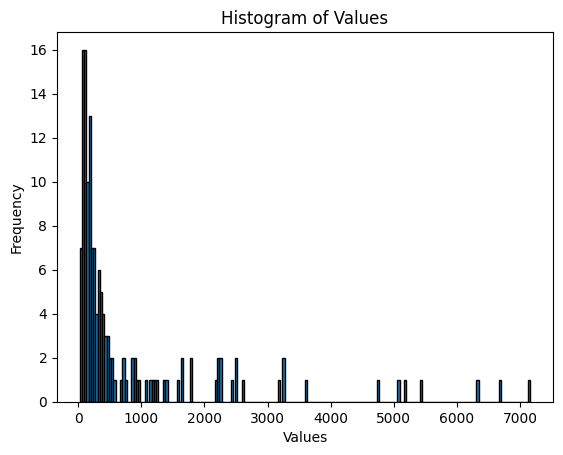

In [40]:
import matplotlib.pyplot as plt

#Scottish Local Authority is a clear outlier with a size of 25000 km2 (only LA with size>7000 km2), it is ignored here
plt.hist(merged_df[merged_df["Area (km2)"]<20000]['Area (km2)'], bins=200, edgecolor='black')

# Set labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Values')

# Display the histogram
plt.show()

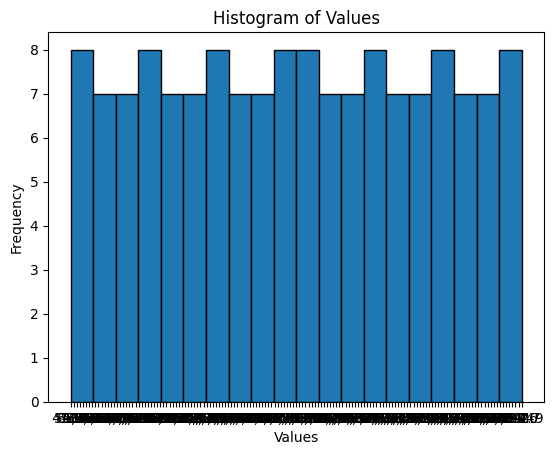

In [42]:
#Scottish Local Authority is a clear outlier with a size of 25000 km2 (only LA with size>7000 km2), it is ignored here
plt.hist(merged_df[merged_df["Area (km2)"]<20000]['Total road length '], bins=20, edgecolor='black')

# Set labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Values')

# Display the histogram
plt.show()

In [160]:
import urllib
import json

url_text = "https://webtris.highwaysengland.co.uk/api/v1/sites"
with urllib.request.urlopen(url_text) as url:
    data = json.loads(url.read().decode())
sites = data['row_count']
sites

19364

In [24]:
import urllib
import json

def isARoad(site):
    return site["Description"].startswith("A")

url_text = "https://webtris.highwaysengland.co.uk/api/v1/sites"
with urllib.request.urlopen(url_text) as url:
    data = json.loads(url.read().decode())
sites = data['sites']

aroads_iterator = filter(isARoad, sites)
aroad_sites = list(aroads_iterator)
aroad_sites

[{'Id': '2',
  'Name': 'MIDAS site at A1M/2259B priority 1 on link 126046101; GPS Ref: 514029;294356; Southbound',
  'Description': 'A1M/2259B',
  'Longitude': -0.320275451712423,
  'Latitude': 52.5351577963853,
  'Status': 'Active'},
 {'Id': '7',
  'Name': 'MIDAS site at A1M/9869K priority 1 on link 118013101; GPS Ref: 439428;465276; Northbound',
  'Description': 'A1M/9869K',
  'Longitude': -1.3988308536688,
  'Latitude': 54.0819152173294,
  'Status': 'Active'},
 {'Id': '14',
  'Name': 'MIDAS site at A2/8392M priority 1 on link 200131423; GPS Ref: 565715;170440; Westbound',
  'Description': 'A2/8392M',
  'Longitude': 0.381354080809833,
  'Latitude': 51.4087721045577,
  'Status': 'Active'},
 {'Id': '22',
  'Name': 'MIDAS site at A14/1908A priority 1 on link 106048001; GPS Ref: 614456;241199; Eastbound',
  'Description': 'A14/1908A',
  'Longitude': 1.12471266263044,
  'Latitude': 52.0277371244491,
  'Status': 'Inactive'},
 {'Id': '32',
  'Name': 'MIDAS site at A1M/9468J priority 1 on li

In [26]:
len(aroad_sites)

1595

In [161]:
import shapefile
from shapely.geometry import shape, Point
#shapefile_location = './GLTLA_DEC_2022_EW_BFC_7755317155209021260/GLTLA_DEC_2022_EW_BFC.shp'
shapefile_location = "./UK_LocalDistrictAuthorities2023/LAD_MAY_2023_UK_BFC.shp"
shp = shapefile.Reader(shapefile_location)
all_shapes = shp.shapes() # get all the polygons
all_records = shp.records()

In [162]:
import pyproj
from shapely.ops import transform

project = pyproj.Transformer.from_proj(
    pyproj.Proj('epsg:27700'), # source coordinate system
    pyproj.Proj('epsg:4326')) # destination coordinate system

#point = aroad_sites[0]["Longitude"],aroad_sites[0]["Latitude"]

final = "NONE"

for i in range(0,len(all_shapes)):
    boundary = transform(project.transform, shape(all_shapes[i])) # get a boundary polygon
    #     print(name_,geometry.Point(pt).within(geometry.shape(boundary)))
    if boundary.contains(Point(aroad_sites[0]["Latitude"], aroad_sites[0]["Longitude"])): # make a point and see if it's in the polygon
      local_authority =  all_records[i][1]
      final = local_authority
final

'Huntingdonshire'

In [110]:
la_dictionary = {record[0]: [] for record in all_records}

In [111]:
all_records[0]

Record #0: ['E06000001', 'Hartlepool', '', 447160, 531474, -1.27018, 54.6761, 'ff5a0e9c-0142-449e-810a-ace8d1700c3f']

In [112]:
project = pyproj.Transformer.from_proj(
    pyproj.Proj('epsg:27700'), # source coordinate system
    pyproj.Proj('epsg:4326')) # destination coordinate system

def assignSiteToLA(site, dictionary):
    for i in range(0,len(all_shapes)):
        boundary = transform(project.transform, shape(all_shapes[i]))
        if boundary.contains(Point(site["Latitude"], site["Longitude"])):
            la_code =  all_records[i][0]
            dictionary[la_code].append(site)
            break

In [114]:
for index, site in enumerate(aroad_sites):
    assignSiteToLA(site, la_dictionary)
    print("DONE ", index + 1, " sites of ", len(aroad_sites), ".\t", int(float(100)*index/len(aroad_sites))), "%%."
la_dictionary

DONE  1  sites of  1595 .	 0
DONE  2  sites of  1595 .	 0
DONE  3  sites of  1595 .	 0
DONE  4  sites of  1595 .	 0
DONE  5  sites of  1595 .	 0
DONE  6  sites of  1595 .	 0
DONE  7  sites of  1595 .	 0
DONE  8  sites of  1595 .	 0
DONE  9  sites of  1595 .	 0
DONE  10  sites of  1595 .	 0
DONE  11  sites of  1595 .	 0
DONE  12  sites of  1595 .	 0
DONE  13  sites of  1595 .	 0
DONE  14  sites of  1595 .	 0
DONE  15  sites of  1595 .	 0
DONE  16  sites of  1595 .	 0
DONE  17  sites of  1595 .	 1
DONE  18  sites of  1595 .	 1
DONE  19  sites of  1595 .	 1
DONE  20  sites of  1595 .	 1
DONE  21  sites of  1595 .	 1
DONE  22  sites of  1595 .	 1
DONE  23  sites of  1595 .	 1
DONE  24  sites of  1595 .	 1
DONE  25  sites of  1595 .	 1
DONE  26  sites of  1595 .	 1
DONE  27  sites of  1595 .	 1
DONE  28  sites of  1595 .	 1
DONE  29  sites of  1595 .	 1
DONE  30  sites of  1595 .	 1
DONE  31  sites of  1595 .	 1
DONE  32  sites of  1595 .	 1
DONE  33  sites of  1595 .	 2
DONE  34  sites of 

{'E06000001': [],
 'E06000002': [],
 'E06000003': [],
 'E06000004': [],
 'E06000005': [],
 'E06000006': [],
 'E06000007': [],
 'E06000008': [],
 'E06000009': [],
 'E06000010': [],
 'E06000011': [],
 'E06000012': [],
 'E06000013': [],
 'E06000014': [],
 'E06000015': [],
 'E06000016': [],
 'E06000017': [],
 'E06000018': [],
 'E06000019': [],
 'E06000020': [],
 'E06000021': [],
 'E06000022': [],
 'E06000023': [],
 'E06000024': [],
 'E06000025': [],
 'E06000026': [],
 'E06000027': [],
 'E06000030': [],
 'E06000031': [],
 'E06000032': [],
 'E06000033': [],
 'E06000034': [],
 'E06000035': [],
 'E06000036': [],
 'E06000037': [],
 'E06000038': [],
 'E06000039': [],
 'E06000040': [],
 'E06000041': [],
 'E06000042': [],
 'E06000043': [],
 'E06000044': [{'Id': '5859',
   'Name': 'MIDAS site at A27/9499B priority 1 on link 103014401; GPS Ref: 468730;105081; Westbound',
   'Description': 'A27/9499B',
   'Longitude': -1.02521711972061,
   'Latitude': 50.8411729609652,
   'Status': 'Active'},
  {'Id'

In [115]:
for key, value in la_dictionary.items():
    if(len(value)==0): continue;
    print(key, ": ", len(value));

E06000044 :  21
E06000047 :  1
E06000049 :  6
E06000056 :  6
E06000061 :  71
E06000062 :  19
E06000065 :  374
E07000009 :  45
E07000011 :  277
E07000012 :  112
E07000033 :  7
E07000036 :  6
E07000085 :  16
E07000090 :  40
E07000098 :  4
E07000099 :  10
E07000106 :  20
E07000107 :  60
E07000108 :  4
E07000109 :  46
E07000110 :  4
E07000112 :  12
E07000113 :  6
E07000115 :  2
E07000131 :  3
E07000134 :  17
E07000200 :  30
E07000202 :  13
E07000203 :  12
E07000209 :  4
E07000216 :  64
E07000222 :  4
E07000241 :  22
E07000243 :  13
E07000244 :  33
E07000245 :  30
E08000004 :  8
E08000005 :  22
E08000024 :  2
E08000035 :  96
E08000036 :  47
E08000037 :  10


In [116]:
with open('LAD_CountSites.json', 'w') as dictionary_json:
    json.dump(la_dictionary, dictionary_json)

In [163]:
with open("LAD_CountSites.json") as dictionary_json:
    data=json.load(dictionary_json)
data

{'E06000001': [],
 'E06000002': [],
 'E06000003': [],
 'E06000004': [],
 'E06000005': [],
 'E06000006': [],
 'E06000007': [],
 'E06000008': [],
 'E06000009': [],
 'E06000010': [],
 'E06000011': [],
 'E06000012': [],
 'E06000013': [],
 'E06000014': [],
 'E06000015': [],
 'E06000016': [],
 'E06000017': [],
 'E06000018': [],
 'E06000019': [],
 'E06000020': [],
 'E06000021': [],
 'E06000022': [],
 'E06000023': [],
 'E06000024': [],
 'E06000025': [],
 'E06000026': [],
 'E06000027': [],
 'E06000030': [],
 'E06000031': [],
 'E06000032': [],
 'E06000033': [],
 'E06000034': [],
 'E06000035': [],
 'E06000036': [],
 'E06000037': [],
 'E06000038': [],
 'E06000039': [],
 'E06000040': [],
 'E06000041': [],
 'E06000042': [],
 'E06000043': [],
 'E06000044': [{'Id': '5859',
   'Name': 'MIDAS site at A27/9499B priority 1 on link 103014401; GPS Ref: 468730;105081; Westbound',
   'Description': 'A27/9499B',
   'Longitude': -1.02521711972061,
   'Latitude': 50.8411729609652,
   'Status': 'Active'},
  {'Id'

In [164]:
num_aroadsites = {key: len(value) for key, value in data.items()}
merged_df["Count Sites"] = merged_df["Local Authority Code"].map(num_aroadsites)
merged_df

,Local Authority Code,Local Authority_x,Region,Area (km2),ONS Area \nCode,Local Authority_y,All 'A' roads,Total road length,Count Sites
95,E09000001,City of London,London,3.1496,E09000001,City of London,12.4,55.4,0
114,E09000020,Kensington and Chelsea,London,12.3837,E09000020,Kensington and Chelsea,32.2,206.6,0
113,E09000019,Islington,London,14.8565,E09000019,Islington,38.5,237.9,0
107,E09000013,Hammersmith and Fulham,London,17.1541,E09000013,Hammersmith and Fulham,32.2,219.9,0
106,E09000012,Hackney,London,19.0492,E09000012,Hackney,35.9,270.4,0
...,...,...,...,...,...,...,...,...,...
157,S12000048,Perth and Kinross,Scotland,5418.9445,S12000048,Perth and Kinross,622.1,"2,902.8",0
147,S12000034,Aberdeenshire,Scotland,6338.1488,S12000034,Aberdeenshire,909.8,"6,257.1",0
129,S12000006,Dumfries and Galloway,Scotland,6676.3147,S12000006,Dumfries and Galloway,784.4,"4,654.6",0
148,S12000035,Argyll and Bute,Scotland,7165.1715,S12000035,Argyll & Bute,796.6,"2,695.1",0


In [213]:
df_merged_final = merged_df[merged_df['Count Sites']>0]
df_merged_final.reset_index(drop=True, inplace=True)
df_merged_final

,Local Authority Code,Local Authority_x,Region,Area (km2),ONS Area \nCode,Local Authority_y,All 'A' roads,Total road length,Count Sites
0,E06000044,Portsmouth,South East,60.1359,E06000044,Portsmouth UA,50.8,458.9,21
1,E08000024,Sunderland,North East,139.6180,E08000024,Sunderland,107.6,"1,174.5",2
2,E08000004,Oldham,North West,142.3450,E08000004,Oldham,99.3,828.8,8
3,E08000037,Gateshead,North East,144.0797,E08000037,Gateshead,77.1,910.7,10
4,E08000005,Rochdale,North West,158.1283,E08000005,Rochdale,83.1,790.7,22
5,E08000036,Wakefield,Yorkshire and the Humber,338.6198,E08000036,Wakefield,175.0,"1,591.4",47
6,E08000035,Leeds,Yorkshire and the Humber,551.7068,E08000035,Leeds,313.0,"3,063.8",96
7,E06000056,Central Bedfordshire,East of England,715.6657,E06000056,Central Bedfordshire UA,167.6,"1,585.4",6
8,E06000061,North Northamptonshire,East Midlands,986.5947,E06000061,North Northamptonshire [Note 1],327.8,"2,040.3",71
9,E06000049,Cheshire East,North West,1166.3577,E06000049,Cheshire East UA,417.8,"2,930.1",6


In [223]:
df_sorted_authorities = df_merged_final.loc[(df_merged_final["Count Sites"]/(df_merged_final["All 'A' roads"].astype(float))).sort_values(ascending=False).index]
df_sorted_authorities.drop(columns=["ONS Area \nCode", "Local Authority_y", "Total road length "], inplace=True)

In [226]:
df_sorted_authorities.to_latex(index=False)

"\\begin{tabular}{lllrlr}\n\\toprule\nLocal Authority Code & Local Authority_x & Region & Area (km2) & All 'A' roads & Count Sites \\\\\n\\midrule\nE06000044 & Portsmouth & South East & 60.135900 & 50.8 & 21 \\\\\nE08000035 & Leeds & Yorkshire and the Humber & 551.706800 & 313.0 & 96 \\\\\nE08000036 & Wakefield & Yorkshire and the Humber & 338.619800 & 175.0 & 47 \\\\\nE08000005 & Rochdale & North West & 158.128300 & 83.1 & 22 \\\\\nE06000061 & North Northamptonshire & East Midlands & 986.594700 & 327.8 & 71 \\\\\nE08000037 & Gateshead & North East & 144.079700 & 77.1 & 10 \\\\\nE08000004 & Oldham & North West & 142.345000 & 99.3 & 8 \\\\\nE06000062 & West Northamptonshire & East Midlands & 1380.395600 & 376.8 & 19 \\\\\nE06000056 & Central Bedfordshire & East of England & 715.665700 & 167.6 & 6 \\\\\nE08000024 & Sunderland & North East & 139.618000 & 107.6 & 2 \\\\\nE06000049 & Cheshire East & North West & 1166.357700 & 417.8 & 6 \\\\\nE06000047 & County Durham & North East & 2232.611

In [216]:
df_merged_final.dtypes

Local Authority Code     object
Local Authority_x        object
Region                   object
Area (km2)              float64
ONS Area \nCode          object
Local Authority_y        object
All 'A' roads            object
Total road length        object
Count Sites               int64
dtype: object

In [166]:
num_aroadsites = {key: len(value) for key, value in data.items()}
df_la["Count Sites"] = df_la["Local Authority Code"].map(num_aroadsites)

df_la_filtered = df_la[df_la['Count Sites']>0]
df_la_filtered

,Local Authority Code,Region,Local Authority,Area (km2),Mid-year Population (thousands),Calendar Year,Count Sites
254186,E06000044,South East,Portsmouth,60.1359,214.692,2020,21.0
141496,E06000047,North East,County Durham,2232.6115,533.149,2020,1.0
160448,E06000049,North West,Cheshire East,1166.3577,386.667,2020,6.0
46016,E06000056,East of England,Central Bedfordshire,715.6657,294.096,2020,6.0
30983,E06000061,East Midlands,North Northamptonshire,986.5947,350.448,2020,71.0
32233,E06000062,East Midlands,West Northamptonshire,1380.3956,406.733,2020,19.0
48559,E07000009,East of England,East Cambridgeshire,651.7204,90.172,2020,45.0
51127,E07000011,East of England,Huntingdonshire,912.5461,178.985,2020,277.0
52435,E07000012,East of England,South Cambridgeshire,901.6873,160.904,2020,112.0
3657,E07000033,East Midlands,Bolsover,160.3347,81.305,2020,7.0


In [167]:
df_la[~df_la["Local Authority Code"].isin(df_roads["ONS Area \nCode"])]

,Local Authority Code,Region,Local Authority,Area (km2),Mid-year Population (thousands),Calendar Year,Count Sites
47305,E07000008,East of England,Cambridge,40.6987,125.063,2020,0.0
48559,E07000009,East of England,East Cambridgeshire,651.7204,90.172,2020,45.0
49819,E07000010,East of England,Fenland,547.3554,102.080,2020,0.0
51127,E07000011,East of England,Huntingdonshire,912.5461,178.985,2020,277.0
52435,E07000012,East of England,South Cambridgeshire,901.6873,160.904,2020,112.0
...,...,...,...,...,...,...,...
398063,N09000009,Northern Ireland,Mid Ulster,1957.2936,148.953,2020,0.0
399187,N09000010,Northern Ireland,"Newry, Mourne and Down",1682.3408,181.669,2020,0.0
388465,N09000011,Northern Ireland,Ards and North Down,566.4732,162.056,2020,0.0
439473,Unallocated,Unallocated,Unallocated consumption,0.0000,0.000,2020,NaN


In [134]:
df_roads[~df_roads["ONS Area \nCode"].isin(df_la["Local Authority Code"])]

,ONS Area \nCode,Region,Local Authority,All 'A' roads,Total road length
80,E10000003,East of England,Cambridgeshire,606.8,"4,848.1"
18,E10000006,North West,Cumbria,"1,013.7","8,057.7"
54,E10000007,East Midlands,Derbyshire,724.1,"5,657.1"
148,E10000008,South West,Devon,"1,136.8","13,038.7"
131,E10000011,South East,East Sussex,454.7,"3,424.5"
81,E10000012,East of England,Essex,647.6,"8,330.6"
150,E10000013,South West,Gloucestershire,605.7,"5,634.1"
132,E10000014,South East,Hampshire,823.1,"9,058.1"
82,E10000015,East of England,Hertfordshire,511.0,"5,053.5"
133,E10000016,South East,Kent,986.2,"9,283.6"


In [168]:
df_la.shape

(377, 7)

In [186]:
import geopandas as gpd
gdf = gpd.read_file("./UK_LocalDistrictAuthorities2023/LAD_MAY_2023_UK_BFC.shp")
print(gdf)

       LAD23CD               LAD23NM        LAD23NMW   BNG_E   BNG_N     LONG  \
0    E06000001            Hartlepool             NaN  447160  531474 -1.27018   
1    E06000002         Middlesbrough             NaN  451141  516887 -1.21099   
2    E06000003  Redcar and Cleveland             NaN  464361  519597 -1.00608   
3    E06000004      Stockton-on-Tees             NaN  444940  518183 -1.30664   
4    E06000005            Darlington             NaN  428029  515648 -1.56835   
..         ...                   ...             ...     ...     ...      ...   
356  W06000020               Torfaen         Torfaen  327459  200480 -3.05101   
357  W06000021         Monmouthshire       Sir Fynwy  337812  209231 -2.90280   
358  W06000022               Newport       Casnewydd  337897  187432 -2.89769   
359  W06000023                 Powys           Powys  302329  273255 -3.43531   
360  W06000024        Merthyr Tydfil  Merthyr Tudful  305916  206424 -3.36425   

         LAT               

<Axes: >

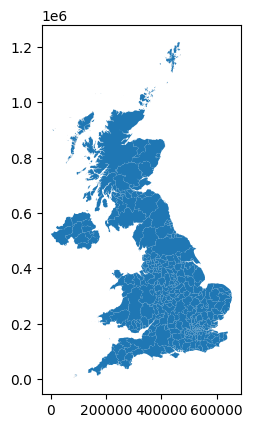

In [137]:
gdf.plot()

In [144]:
print(gdf)

       LAD23CD               LAD23NM        LAD23NMW   BNG_E   BNG_N     LONG  \
0    E06000001            Hartlepool             NaN  447160  531474 -1.27018   
1    E06000002         Middlesbrough             NaN  451141  516887 -1.21099   
2    E06000003  Redcar and Cleveland             NaN  464361  519597 -1.00608   
3    E06000004      Stockton-on-Tees             NaN  444940  518183 -1.30664   
4    E06000005            Darlington             NaN  428029  515648 -1.56835   
..         ...                   ...             ...     ...     ...      ...   
356  W06000020               Torfaen         Torfaen  327459  200480 -3.05101   
357  W06000021         Monmouthshire       Sir Fynwy  337812  209231 -2.90280   
358  W06000022               Newport       Casnewydd  337897  187432 -2.89769   
359  W06000023                 Powys           Powys  302329  273255 -3.43531   
360  W06000024        Merthyr Tydfil  Merthyr Tudful  305916  206424 -3.36425   

         LAT               

In [187]:
gdf = gdf.merge(df_merged_final, left_on="LAD23CD", right_on="Local Authority Code", how="outer")

In [188]:
print(gdf)

       LAD23CD               LAD23NM        LAD23NMW   BNG_E   BNG_N     LONG  \
0    E06000001            Hartlepool             NaN  447160  531474 -1.27018   
1    E06000002         Middlesbrough             NaN  451141  516887 -1.21099   
2    E06000003  Redcar and Cleveland             NaN  464361  519597 -1.00608   
3    E06000004      Stockton-on-Tees             NaN  444940  518183 -1.30664   
4    E06000005            Darlington             NaN  428029  515648 -1.56835   
..         ...                   ...             ...     ...     ...      ...   
356  W06000020               Torfaen         Torfaen  327459  200480 -3.05101   
357  W06000021         Monmouthshire       Sir Fynwy  337812  209231 -2.90280   
358  W06000022               Newport       Casnewydd  337897  187432 -2.89769   
359  W06000023                 Powys           Powys  302329  273255 -3.43531   
360  W06000024        Merthyr Tydfil  Merthyr Tudful  305916  206424 -3.36425   

         LAT               

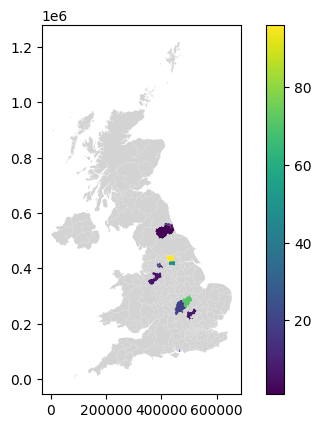

In [190]:
gdf.plot(column='Count Sites', missing_kwds={'color': 'lightgray'}, legend=True);

In [185]:
gdf.explore()

TypeError: 'NoneType' object is not subscriptable

<Axes: >

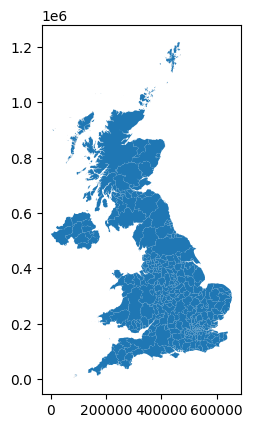

In [176]:
gdf.plot()

In [199]:
df_merged_final
temp = list(df_merged_final["Local Authority Code"])
suitable_countsites={key: data[key] for key in temp}
suitable_countsites

{'E06000044': [{'Id': '5859',
   'Name': 'MIDAS site at A27/9499B priority 1 on link 103014401; GPS Ref: 468730;105081; Westbound',
   'Description': 'A27/9499B',
   'Longitude': -1.02521711972061,
   'Latitude': 50.8411729609652,
   'Status': 'Active'},
  {'Id': '9663',
   'Name': 'MIDAS site at A27/9496A priority 1 on link 103014001; GPS Ref: 468517;104921; Eastbound',
   'Description': 'A27/9496A',
   'Longitude': -1.02827184258724,
   'Latitude': 50.8397596348647,
   'Status': 'Active'},
  {'Id': '9826',
   'Name': 'MIDAS site at A27/9485A priority 1 on link 103014601; GPS Ref: 467602;104380; Eastbound',
   'Description': 'A27/9485A',
   'Longitude': -1.04136477395217,
   'Latitude': 50.8350026978759,
   'Status': 'Active'},
  {'Id': '9864',
   'Name': 'MIDAS site at A27/9472A priority 1 on link 103014701; GPS Ref: 466355;104447; Eastbound',
   'Description': 'A27/9472A',
   'Longitude': -1.05905889505509,
   'Latitude': 50.8357494593955,
   'Status': 'Active'},
  {'Id': '9877',
  

In [1]:
df_merged_final

NameError: name 'df_merged_final' is not defined